<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/Applied_Machine_and_Deep_Learning_Tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

<function matplotlib.pyplot.show(close=None, block=None)>

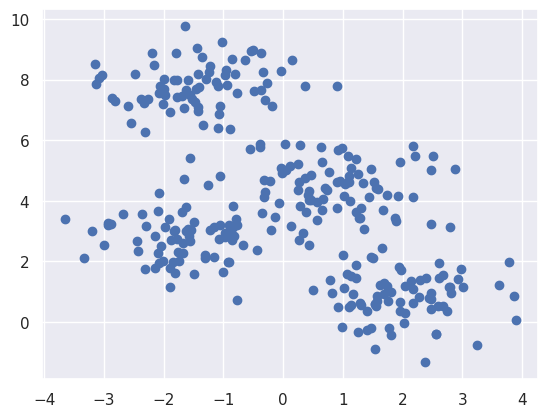

In [ ]:
X, y = make_blobs(n_samples = 300, n_features= 2, random_state = 0, centers=4, cluster_std= 0.8)
plt.scatter(x = X[:, 0], y = X[:, 1])
plt.show

#K Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


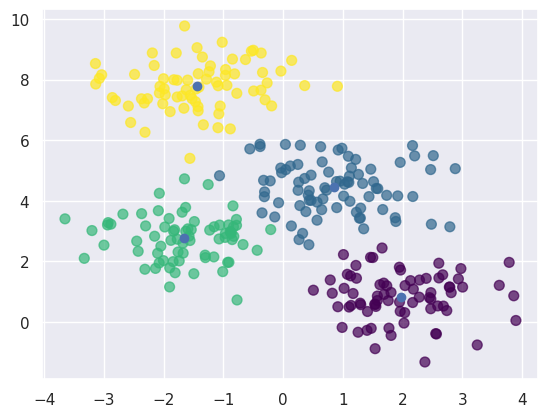

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X)
predicted_X_indices = kmeans.predict(X)
plt.scatter(x = X[:, 0], y = X[:, 1], c = predicted_X_indices, s=50, alpha=0.7, cmap='viridis')
centres = kmeans.cluster_centers_
plt.scatter(centres[:, 0], centres[:, 1])
plt.show()

#Picking the right number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


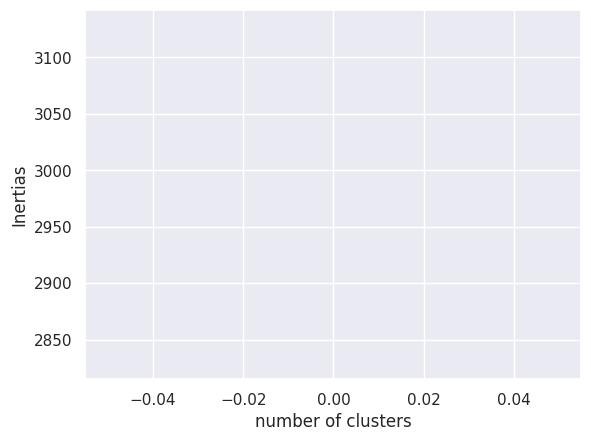

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


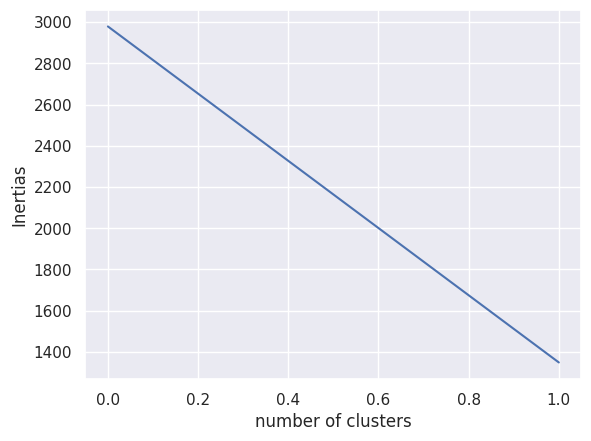

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


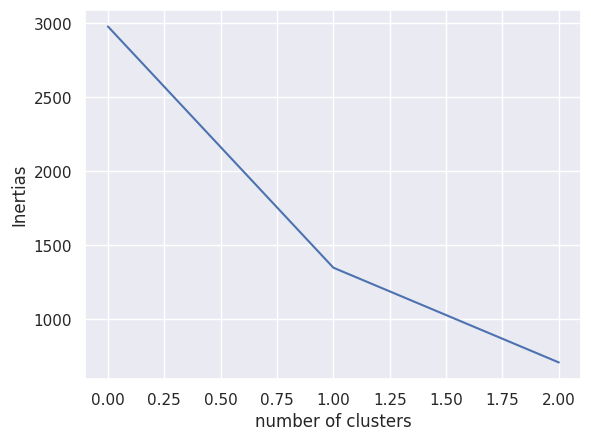

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


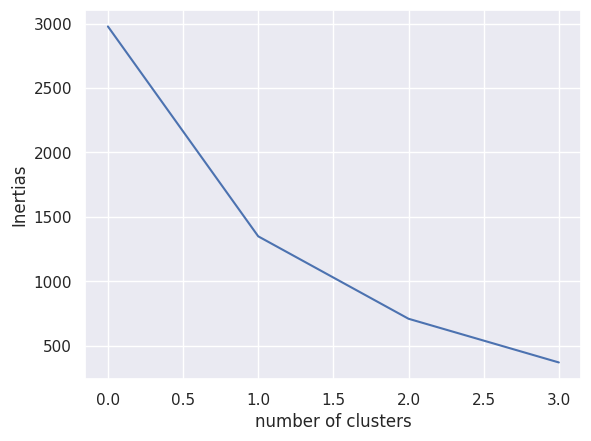

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


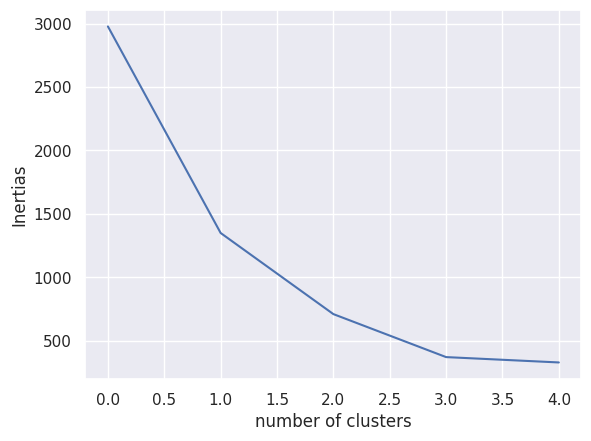

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


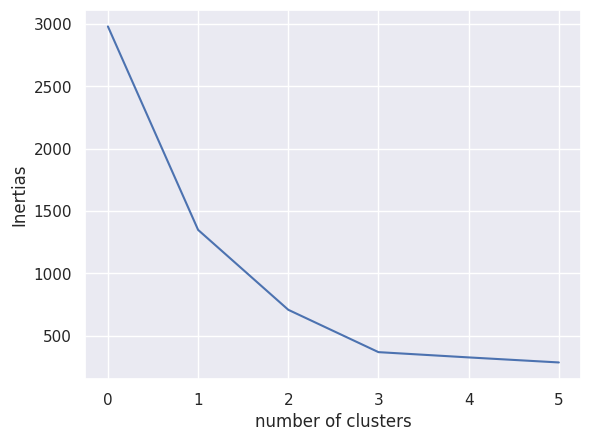

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


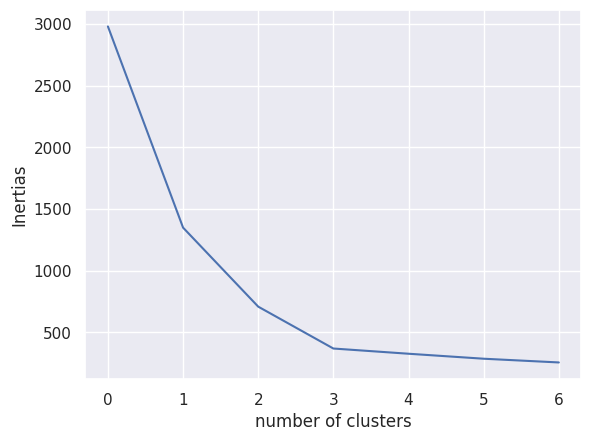

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


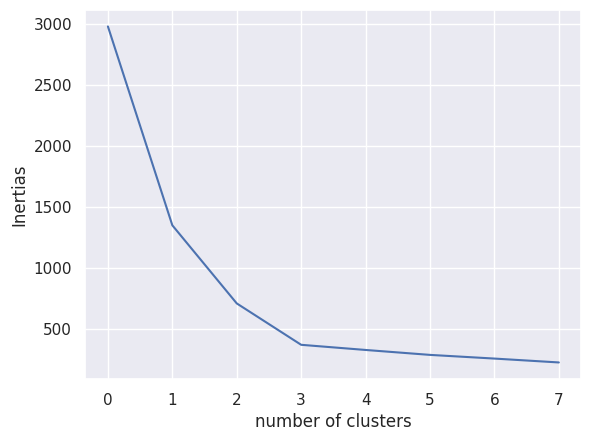

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


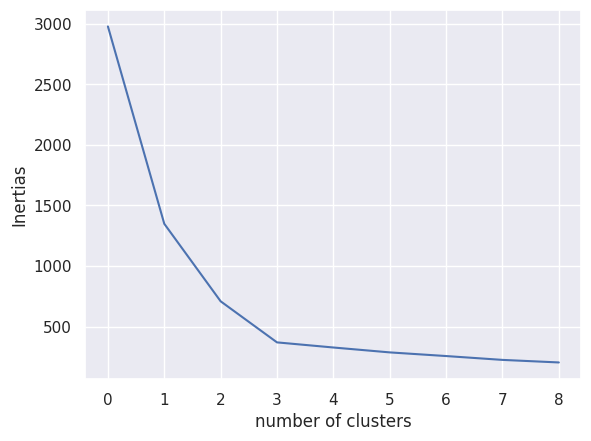

In [ ]:
#Use inertia
inertias = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(X)
  inertias.append(kmeans.inertia_)
  plt.plot(range(i), inertias)
  plt.xlabel("number of clusters")
  plt.ylabel("Inertias")
  plt.show()

In [ ]:
#it appears 3 is the right number

# Applying k-Means Clustering to Customer Data

Let’s use k-means clustering to tackle a real problem:
segmenting customers to identify ones to target with a
promotion to increase their purchasing activity. The dataset
that you’ll use is a sample customer segmentation dataset
named customers.csv. Start by creating a subdirectory named
Data in the folder where your notebooks reside, downloading
customers.csv, and copying it into the Data subdirectory.
Then use the following code to load the dataset into a Pandas
DataFrame and display the first five rows:


In [2]:
import pandas as pd
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
df.corr().T


<ipython-input-16-50be2e233ef7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().T


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [17]:
#let us do some plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

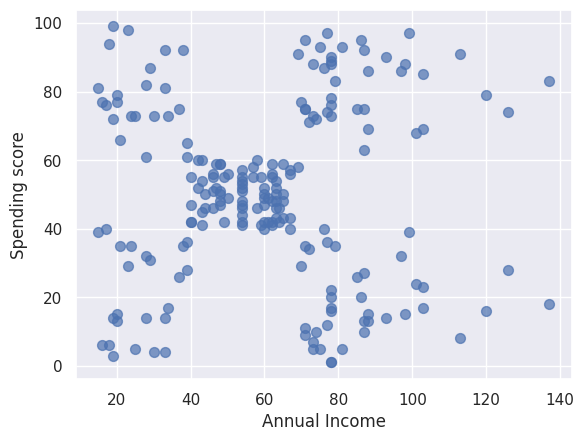

In [22]:
#Let us first select our value points
v_points = df.iloc[:, 3:5].values
#We define our X and y
X = v_points[:, 0]
y = v_points[:, 1]
plt.scatter(X, y, s = 50, alpha = 0.7)
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


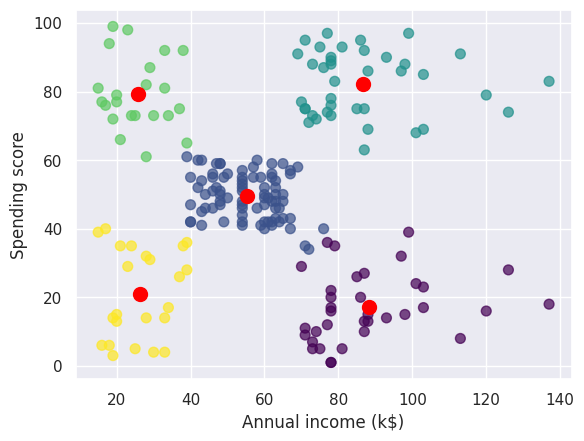

In [24]:
#As it can be seen, the data falls roghly into 5 clusters;
#Hence, we segement the customers into 5 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(v_points)
predicted_cluster_indices = kmeans.predict(v_points)
plt.scatter(X, y, c = predicted_cluster_indices,  s=50, alpha=0.7, cmap='viridis')
plt.xlabel("Annual income (k$)")
plt.ylabel("Spending score")
centers =   kmeans.cluster_centers_
#Also plot centers for X and y
X_center = centers[:, 0]
y_center = centers[:, 1]
plt.scatter(X_center, y_center, s = 100, c = "red")
plt.show()

In [26]:
"""The customers in the lower-right quadrant of the chart might
be good ones to target with a promotion to increase their
spending. Why? Because they have high incomes but low
spending scores. """
#Let us add a column of cluster indices
df0  = df.copy()
df["cluster"] = kmeans.predict(v_points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [27]:
#We are now going to output the IDs of customers who have high incomes but low spending scores:
import numpy as np
#get clusters
clusters = kmeans.predict(np.array([[120, 20]]))[0]
#Filter the DataFrame to include only customers in that cluster
clustered_df = df[df["cluster"]== clusters]
#Show the customer IDs
clustered_df["CustomerID"].values

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199])

In [33]:
df0["Annual Income (k$)"].values

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9